In [0]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('Train.csv')

In [0]:
df.head()

customer_id demographic_slice  ... axio_score card_offer
0       713782           AX03efs  ...   0.137289      False
1       515901           AX03efs  ...   0.052264      False
2        95166           AX03efs  ...   0.452035      False
3       425557           AX03efs  ...   0.564619      False
4       624581           AX03efs  ...   0.917304      False

[5 rows x 12 columns]

# **Data Cleaning and Data Exploration**

**The corelation between various features is done below.**

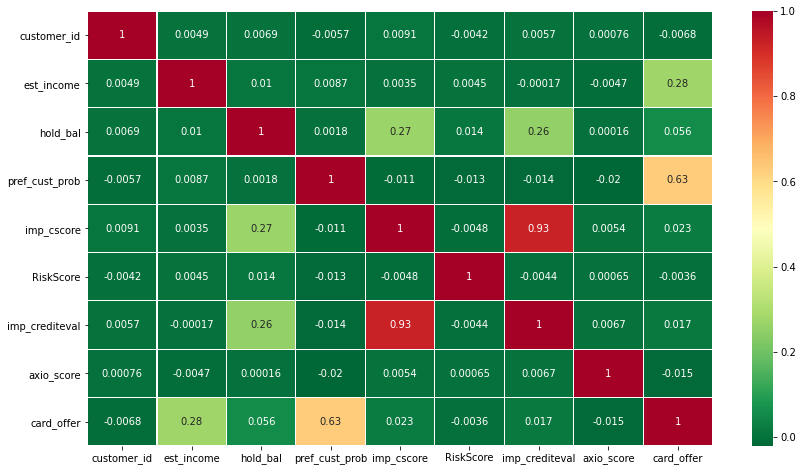

In [0]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), cmap ="RdYlGn_r", linewidths = 0.1, annot=True) 

We can see that the corelation between imp_creditval("Credit value") and 
imp_cscore("Credit score"). But they are mathematically related so it's of no use.
The other features that are highly corelated are:
1.  pref_cust_prob and card_offer - 0.63
2.  est_income and card_offer - 0.28
3.  hold_bal and imp_cscore - 0.27
4.  imp_creditval and hold_bal - 0.26

<Figure size 1008x576 with 0 Axes>

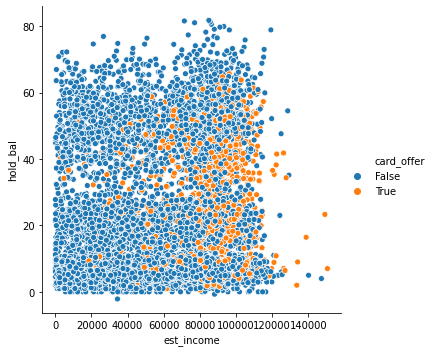

In [0]:
plt.figure(figsize=(14,8))
sns.relplot(x='est_income',y='hold_bal',data=df,hue='card_offer')

**The lower the est_income and hold_bal are the more chance is there for the card_offer to be rejected. Also, the points are close to one other it is hard to depict for these two features.**

<Figure size 1008x576 with 0 Axes>

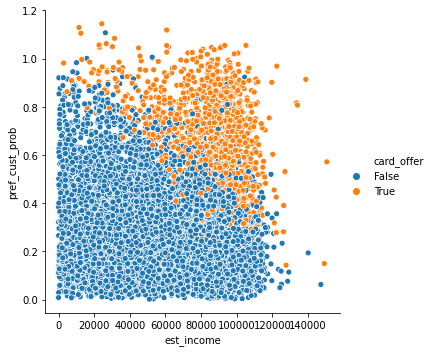

In [0]:
plt.figure(figsize=(14,8))
sns.relplot(x='est_income',y='pref_cust_prob',data=df,hue='card_offer')

***The lower the est_income or pref_cust_prob or both the higher the chance for the card_offer to be rejecteed. But if both are high enough then the card_offer is accepted.
The data points can be seperated by a straight line of the form y=mx+c ***

<Figure size 1008x576 with 0 Axes>

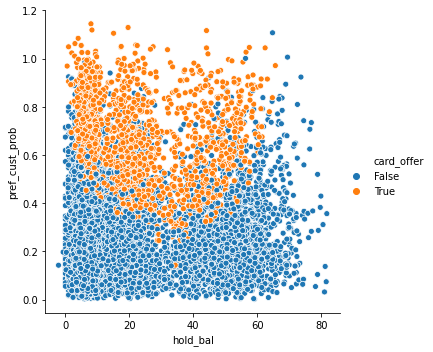

In [0]:
plt.figure(figsize=(14,8))
sns.relplot(x='hold_bal',y='pref_cust_prob',data=df,hue='card_offer')

**As you can see there is a parabola shape in the graph to seperate the data points. This means the higher the difference between the pref_cust_prob and hold_bal the more chance there is for the card_offer to be True.**

**Corelation between the important features**

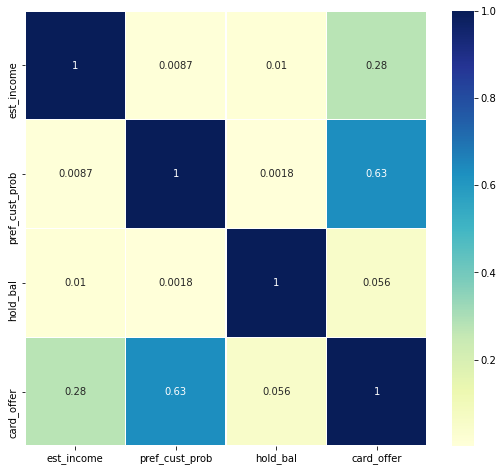

In [0]:
corrmat = df[['est_income', 'pref_cust_prob', 'hold_bal', 'card_offer']].corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True) 

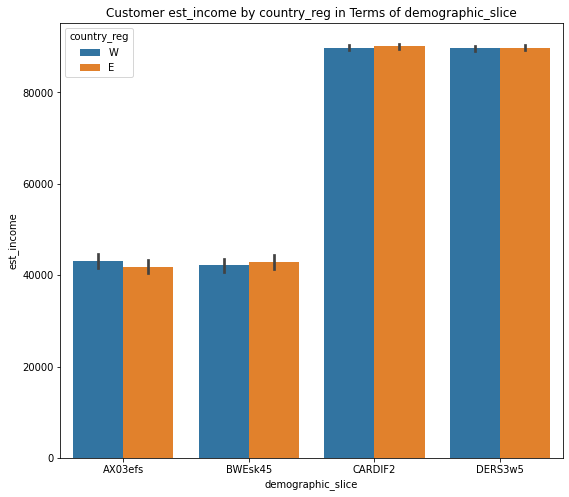

In [0]:
f, ax = plt.subplots(figsize =(9, 8)) 
plt.title('Customer est_income by country_reg in Terms of demographic_slice')
sns.barplot(y = df.est_income, x = df.demographic_slice, hue = df.country_reg)

**The above graph shows the est_income in various demographic_slice with region. And according to graph the demographic slice "CARDIF2" in the "E" region has the highest est_income.**

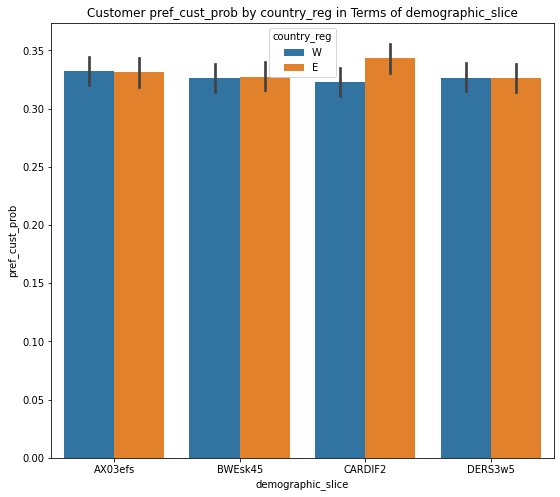

In [0]:
f, ax = plt.subplots(figsize =(9, 8)) 
plt.title('Customer pref_cust_prob by country_reg in Terms of demographic_slice')
sns.barplot(y = df.pref_cust_prob, x = df.demographic_slice, hue = df.country_reg)

**The pref_cust_prob(Preferred Customer Probability) is highest in the "CARDIF2" demographic_slice in the "E" region.**

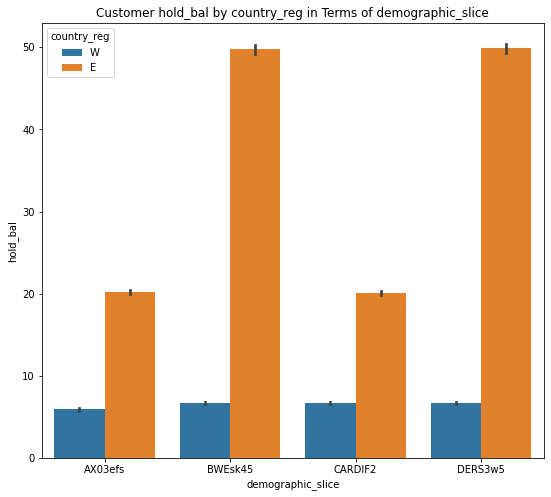

In [0]:
f, ax = plt.subplots(figsize =(9, 8)) 
plt.title('Customer hold_bal by country_reg in Terms of demographic_slice')
sns.barplot(y = df.hold_bal, x = df.demographic_slice, hue = df.country_reg)

**The above graph shows that the cutomers with lowest hold_bal(balance on hold in the account) are in the "CARDIF2" demographic_slice in the "E" region.**

**All this shows that the customer from the "CARDIF2" demographic slice in the "E" region has the highest chance of getting the credit card(i.e., card_offer = True)**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82c8e869b0>,
      dtype=object)

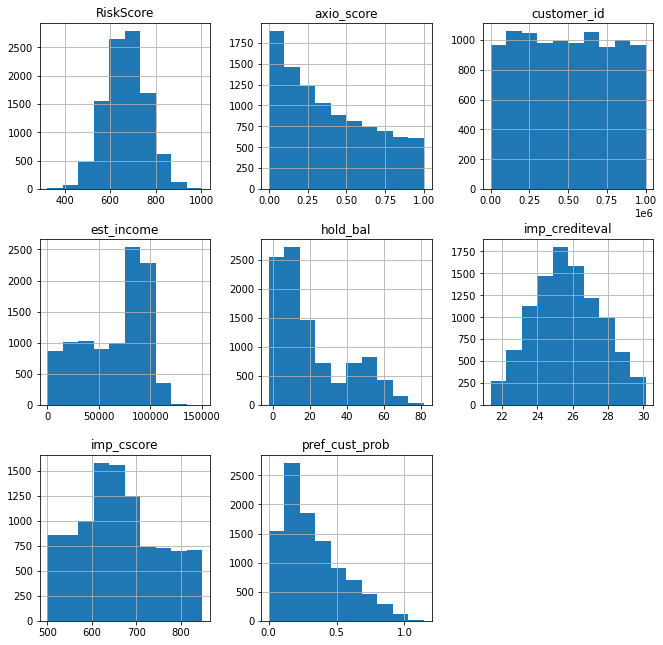

In [0]:
 df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [0]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])

**The corelation between the features after the label-encoding is given below. This also gives us the features which are considered as strings in the previous corelation matrix.**

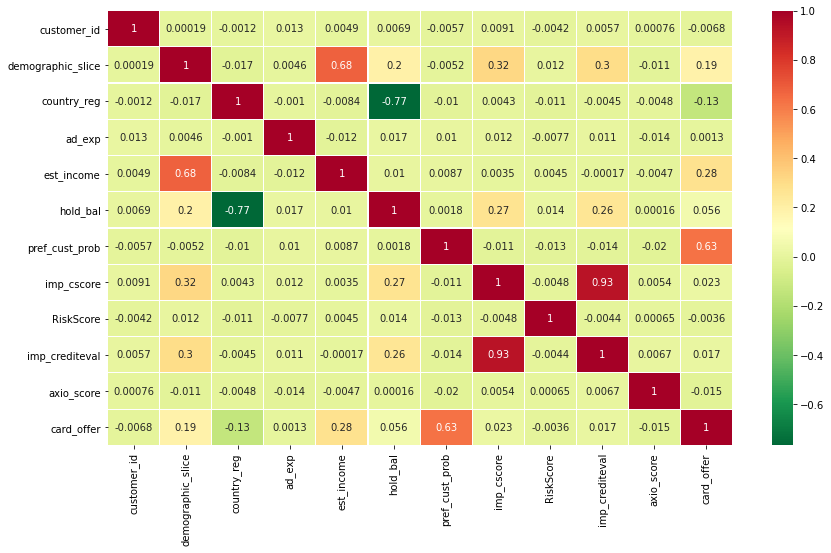

In [0]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), cmap ="RdYlGn_r", linewidths = 0.1, annot=True) 

The features that are highly corelated are:
1.  pref_cust_prob and card_offer - 0.63
2.  demographic_slice and imp_cscore - 0.32(This is not in the previous corelation matrix as demographic_slice is considered string in the previous one.)
3.  est_income and card_offer - 0.28
4.  hold_bal and imp_cscore - 0.27
5.  imp_creditval and hold_bal - 0.26

In [0]:
df['card_offer'] = (df['card_offer'] == True).astype(int)

In [0]:
df.dtypes

customer_id            int64
demographic_slice      int64
country_reg            int64
ad_exp                 int64
est_income           float64
hold_bal             float64
pref_cust_prob       float64
imp_cscore             int64
RiskScore            float64
imp_crediteval       float64
axio_score           float64
card_offer             int64
dtype: object

In [0]:
df.head()

customer_id  demographic_slice  ...  axio_score  card_offer
0       713782                  0  ...    0.137289           0
1       515901                  0  ...    0.052264           0
2        95166                  0  ...    0.452035           0
3       425557                  0  ...    0.564619           0
4       624581                  0  ...    0.917304           0

[5 rows x 12 columns]

# **Model Building**

In [0]:
X = df.drop('card_offer', axis=1)
y = df['card_offer']

**Splitting the data into train and test in the ratio of 75% training and 25% testing.**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

**Since our data is more of a yes or no answer we use classification and not regression so we will only see classifiers.**

## **KNeighbors Classifier**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

### **Number of neighbors = 1**

In [0]:
clf_knn = KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(X_train, y_train)
clf_knn.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_knn.score(X_test, y_test)))

Accuracy: 0.75


### **Number of neighbors = 3**

In [0]:
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)
clf_knn.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_knn.score(X_test, y_test)))

Accuracy: 0.80


### **Number of neighbors = 10**

In [0]:
clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn.fit(X_train, y_train)
clf_knn.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_knn.score(X_test, y_test)))

Accuracy: 0.83


**As we increase the number of neighbors the accuracy increases but it overfits.**

## **Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
clf_dtc = DecisionTreeClassifier(random_state=42)
clf_dtc.fit(X_train, y_train)
clf_dtc.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_dtc.score(X_test, y_test)))

Accuracy: 0.96


In [0]:
from sklearn.tree import export_graphviz
export_graphviz(clf_dtc, out_file="tree.dot", class_names=["True", "False"], impurity=False, filled=True)

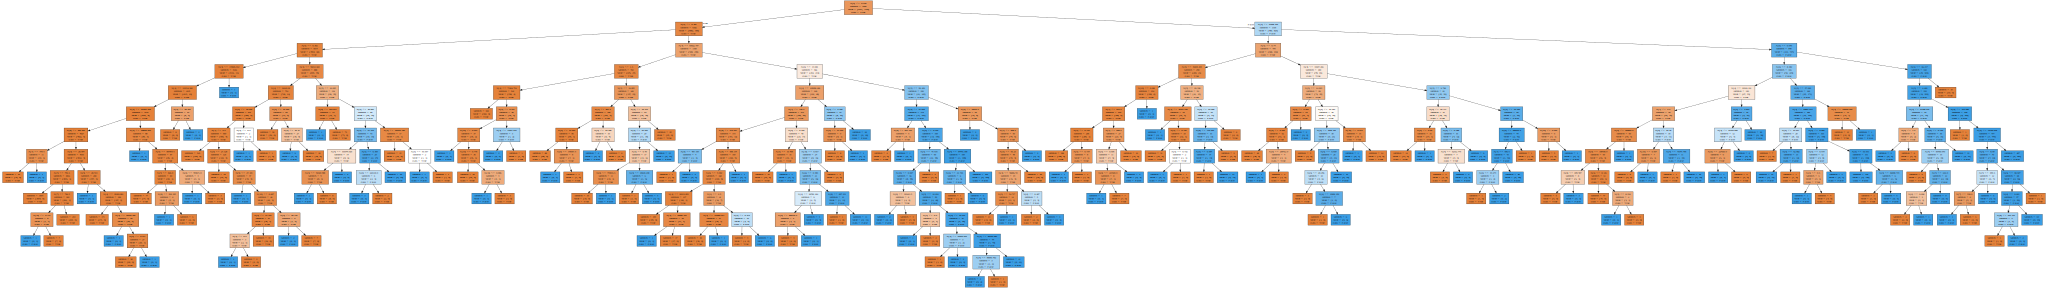

In [0]:
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

## **Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf_rfc = RandomForestClassifier(n_estimators=100)
clf_rfc.fit(X_train, y_train)
clf_rfc.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_rfc.score(X_test, y_test)))

Accuracy: 0.97


## **Naive Bayes Gaussian**

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.predict(X_test)
print('Accuracy: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy: 0.84


## **Naive Bayes Bernoulli**

In [0]:
from sklearn.naive_bayes import BernoulliNB

In [0]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb.predict(X_test)
print('Accuracy: {:.2f}'.format(bnb.score(X_test, y_test)))

Accuracy: 0.84


## **Cross-validation with Decision Tree**

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
clf_dtc = DecisionTreeClassifier(random_state = 40)
scores = cross_val_score(clf_dtc, X, y, cv = 5)
scores

array([0.9295, 0.9725, 0.973 , 0.936 , 0.921 ])

## **Cross-validation with Random Forest**

In [0]:
clf_rfc = RandomForestClassifier(n_estimators = 100, random_state=555)
scores = cross_val_score(clf_rfc, X, y, cv = 5)
scores

array([0.899 , 0.9765, 0.973 , 0.943 , 0.9395])

## **Bagging Classifier**

In [0]:
from sklearn.ensemble import BaggingClassifier

In [0]:
bgc = BaggingClassifier(clf_dtc, n_estimators = 100,  random_state = 1)
bgc.fit(X_train, y_train)
res = cross_val_score(bgc, X, y, cv = 5)
res

array([0.943 , 0.9785, 0.9765, 0.954 , 0.9615])

In [0]:
bgc = BaggingClassifier(clf_rfc, n_estimators = 100, random_state = 1)
bgc.fit(X_train, y_train)
res = cross_val_score(bgc, X, y, cv = 5)
res

array([0.9015, 0.973 , 0.9745, 0.945 , 0.938 ])

In [0]:
from sklearn.ensemble import BaggingClassifier

In [0]:
clf_bgc = BaggingClassifier(n_estimators = 100)
clf_bgc.fit(X_train, y_train)
clf_bgc.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_bgc.score(X_test, y_test)))

Accuracy: 0.97


## **Support Vector Classifier**

In [0]:
from sklearn.svm import SVC

In [0]:
clf_svc = SVC(random_state=0, probability=True)
clf_svc.fit(X_train, y_train)
clf_svc.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_svc.score(X_test, y_test)))

Accuracy: 0.84


## **Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
clf_lr = LogisticRegression(random_state = 555)
clf_lr.fit(X_train, y_train)
clf_lr.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_lr.score(X_test, y_test)))

Accuracy: 0.84


## **Gradient Boost Classifier**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
clf_gbc = GradientBoostingClassifier(n_estimators = 100)
clf_gbc.fit(X_train, y_train)
clf_gbc.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_gbc.score(X_test, y_test)))

Accuracy: 0.98


## **XGBOOST Classifier**

In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [0]:
clf_xgb = XGBClassifier(n_estimators = 100, objective= 'binary:logistic', seed=555)
clf_xgb.fit(X_train, y_train)
clf_xgb.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_xgb.score(X_test, y_test)))

Accuracy: 0.98


In [0]:
clf_xgb_params = {
    'eta': [0.01, 0.025, 0.05, 0.075, 0.25],
    'max_depth': [3, 5, 6, 7, 9],
    'tree_method': ['auto', 'exact', 'approx', 'hist', 'gpu_hist'],
    'booster' : ['gbtree', 'gblinear', 'dart']
}

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [0]:
kfold = StratifiedKFold(n_splits=5)

## **Getting the best parameters for XGBoost using GridSerachCV**

In [0]:
clf_XGB = XGBClassifier(n_estimators = 100, objective= 'binary:logistic', seed=555)
grid2 = GridSearchCV(clf_XGB, clf_xgb_params, scoring="roc_auc", cv=kfold, verbose=10, n_jobs=-1)
grid2.fit(X_train, y_train)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:...
                                     scale_pos_weight=1, seed=555, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'eta': [0.01, 0.025, 0.05, 0.075, 0.25],
                         'max_depth': [3, 5, 6, 7, 9],
     

In [0]:
print ('Best Parameters: ', grid2.best_params_)
results = sklearn.model_selection.cross_val_score(grid2.best_estimator_, X_train,y_train, cv=kfold)
print ("Accuracy - Train CV: ", results.mean())
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(grid2.best_estimator_.predict(X_train), y_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(grid2.best_estimator_.predict(X_test), y_test))

Best Parameters:  {'booster': 'gbtree', 'eta': 0.01, 'max_depth': 9, 'tree_method': 'approx'}
Accuracy - Train CV:  0.9817333333333332
Accuracy - Train :  1.0
Accuracy - Test :  0.98


## **XGBoost Model using the best parameters obtained from GridSearchCV**

In [0]:
data_dmatrix = xgb.DMatrix(data = X, label = y)

In [0]:
params = {'booster': 'gbtree', 'eta': 0.01, 'max_depth': 5, 'tree_method': 'approx'}
params['nthread'] = 4
params['eval_metric'] = 'rmse'

In [0]:
cv_results = xgb.cv(dtrain = data_dmatrix, params = params, nfold = 3,
                    num_boost_round = 50, early_stopping_rounds = 10, metrics = "rmse", as_pandas = True, seed = 123)

In [0]:
cv_results.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         0.495590        0.000020        0.495676       0.000049
1         0.491229        0.000037        0.491398       0.000098
2         0.486917        0.000055        0.487180       0.000164
3         0.482646        0.000064        0.483013       0.000225
4         0.478429        0.000080        0.478884       0.000278

In [0]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

In [0]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [0]:
num_round = 10
bst = xgb.train(params, dtrain, num_round, evallist)

[0]	eval-rmse:0.495705	train-rmse:0.495617
[1]	eval-rmse:0.491441	train-rmse:0.491267
[2]	eval-rmse:0.487247	train-rmse:0.486995
[3]	eval-rmse:0.483078	train-rmse:0.482738
[4]	eval-rmse:0.478959	train-rmse:0.478543
[5]	eval-rmse:0.474875	train-rmse:0.474382
[6]	eval-rmse:0.470858	train-rmse:0.470278
[7]	eval-rmse:0.46688	train-rmse:0.466221
[8]	eval-rmse:0.462943	train-rmse:0.4622
[9]	eval-rmse:0.459049	train-rmse:0.458201


In [0]:
ypred = bst.predict(dtest)
ypred

array([0.4534677 , 0.45240822, 0.4534677 , ..., 0.45240822, 0.453022  ,
       0.5423048 ], dtype=float32)

### **Getting the important features using XGBoost**

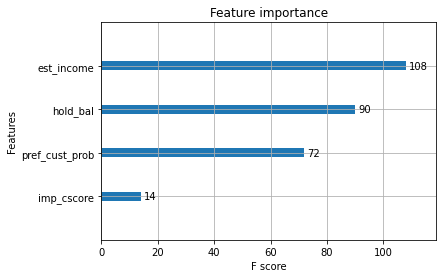

In [0]:
xgb.plot_importance(bst)

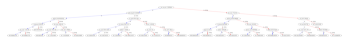

In [0]:
xgb.plot_tree(bst, num_trees=6)

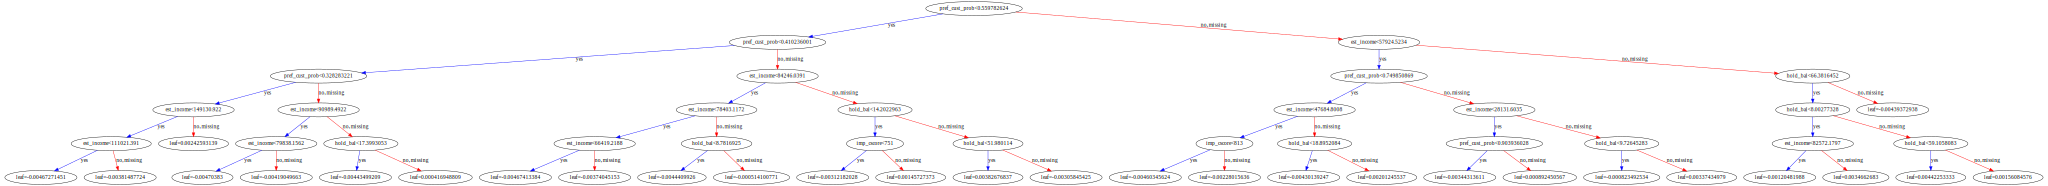

In [0]:
xgb.to_graphviz(bst, num_trees=6)

### **The Tree using XGBoost.**

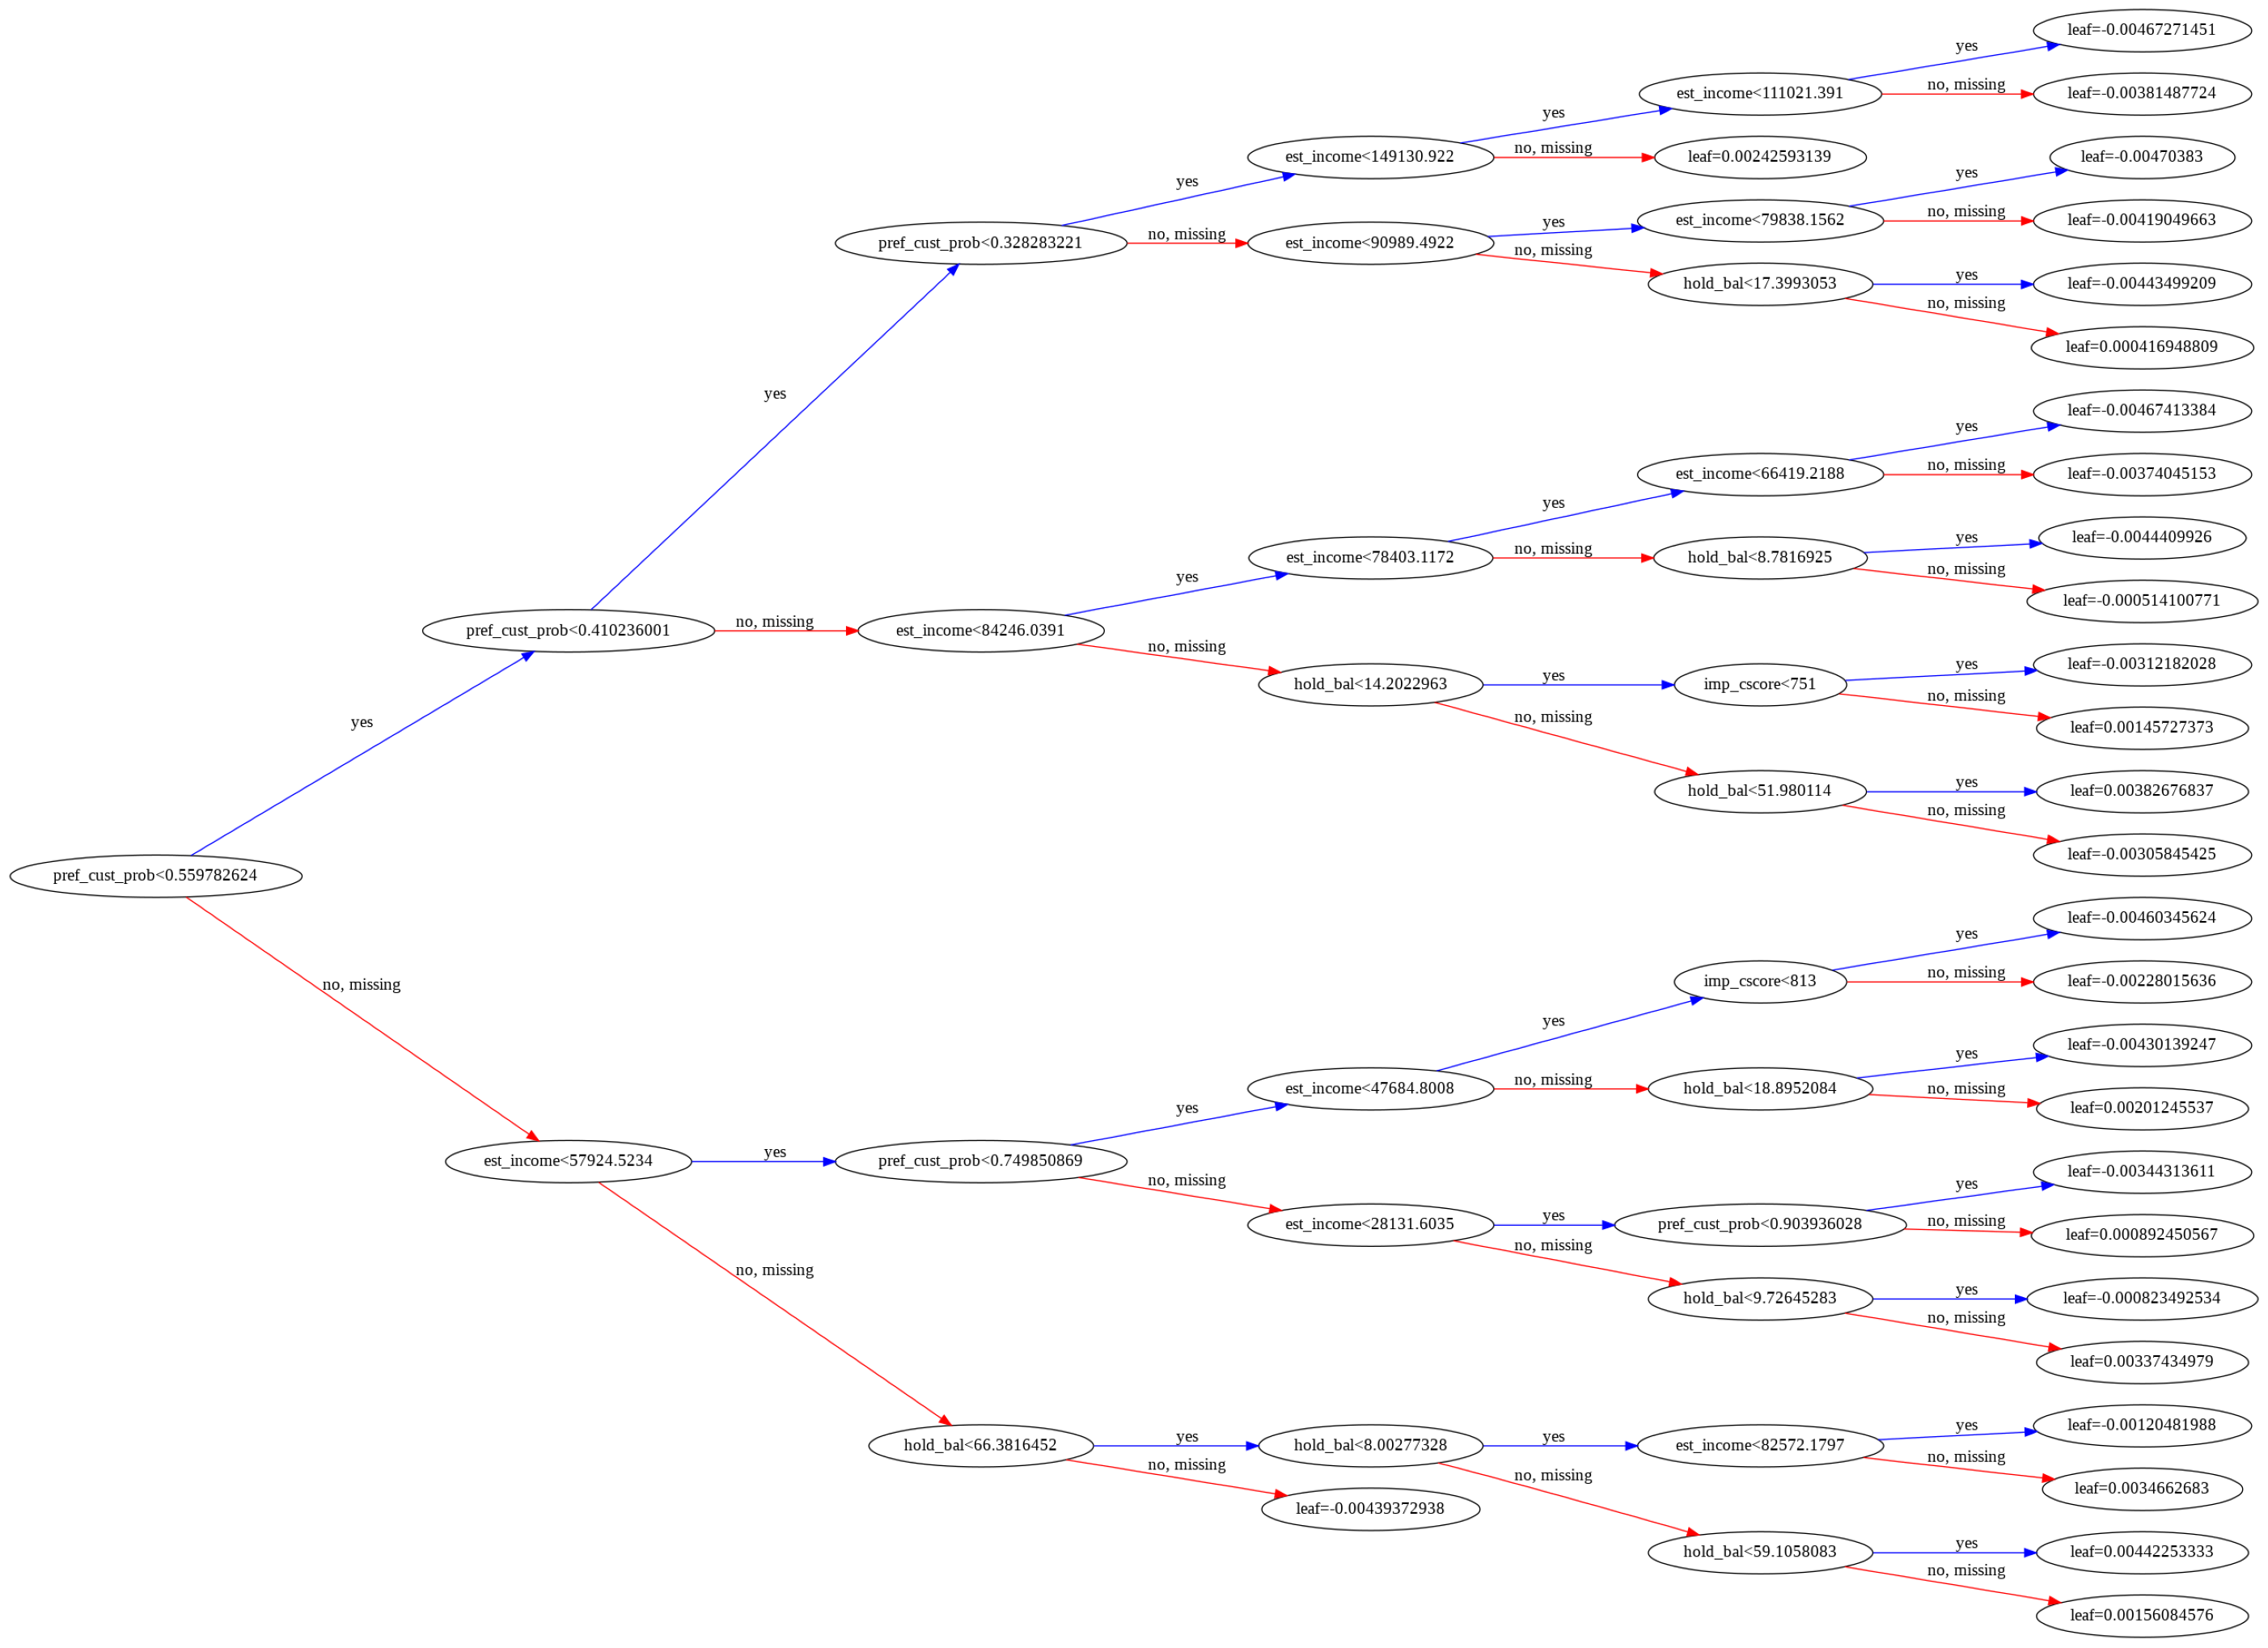

In [0]:
%matplotlib inline
from xgboost import plot_tree
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

##set up the parameters
#f, ax = plt.subplots(figsize =(20, 15)) 
rcParams['figure.figsize'] = 50,50
#plt.figure(figsize=(9,8))
plot_tree(bst, num_trees=6, rankdir='LR')

<Figure size 648x576 with 0 Axes>

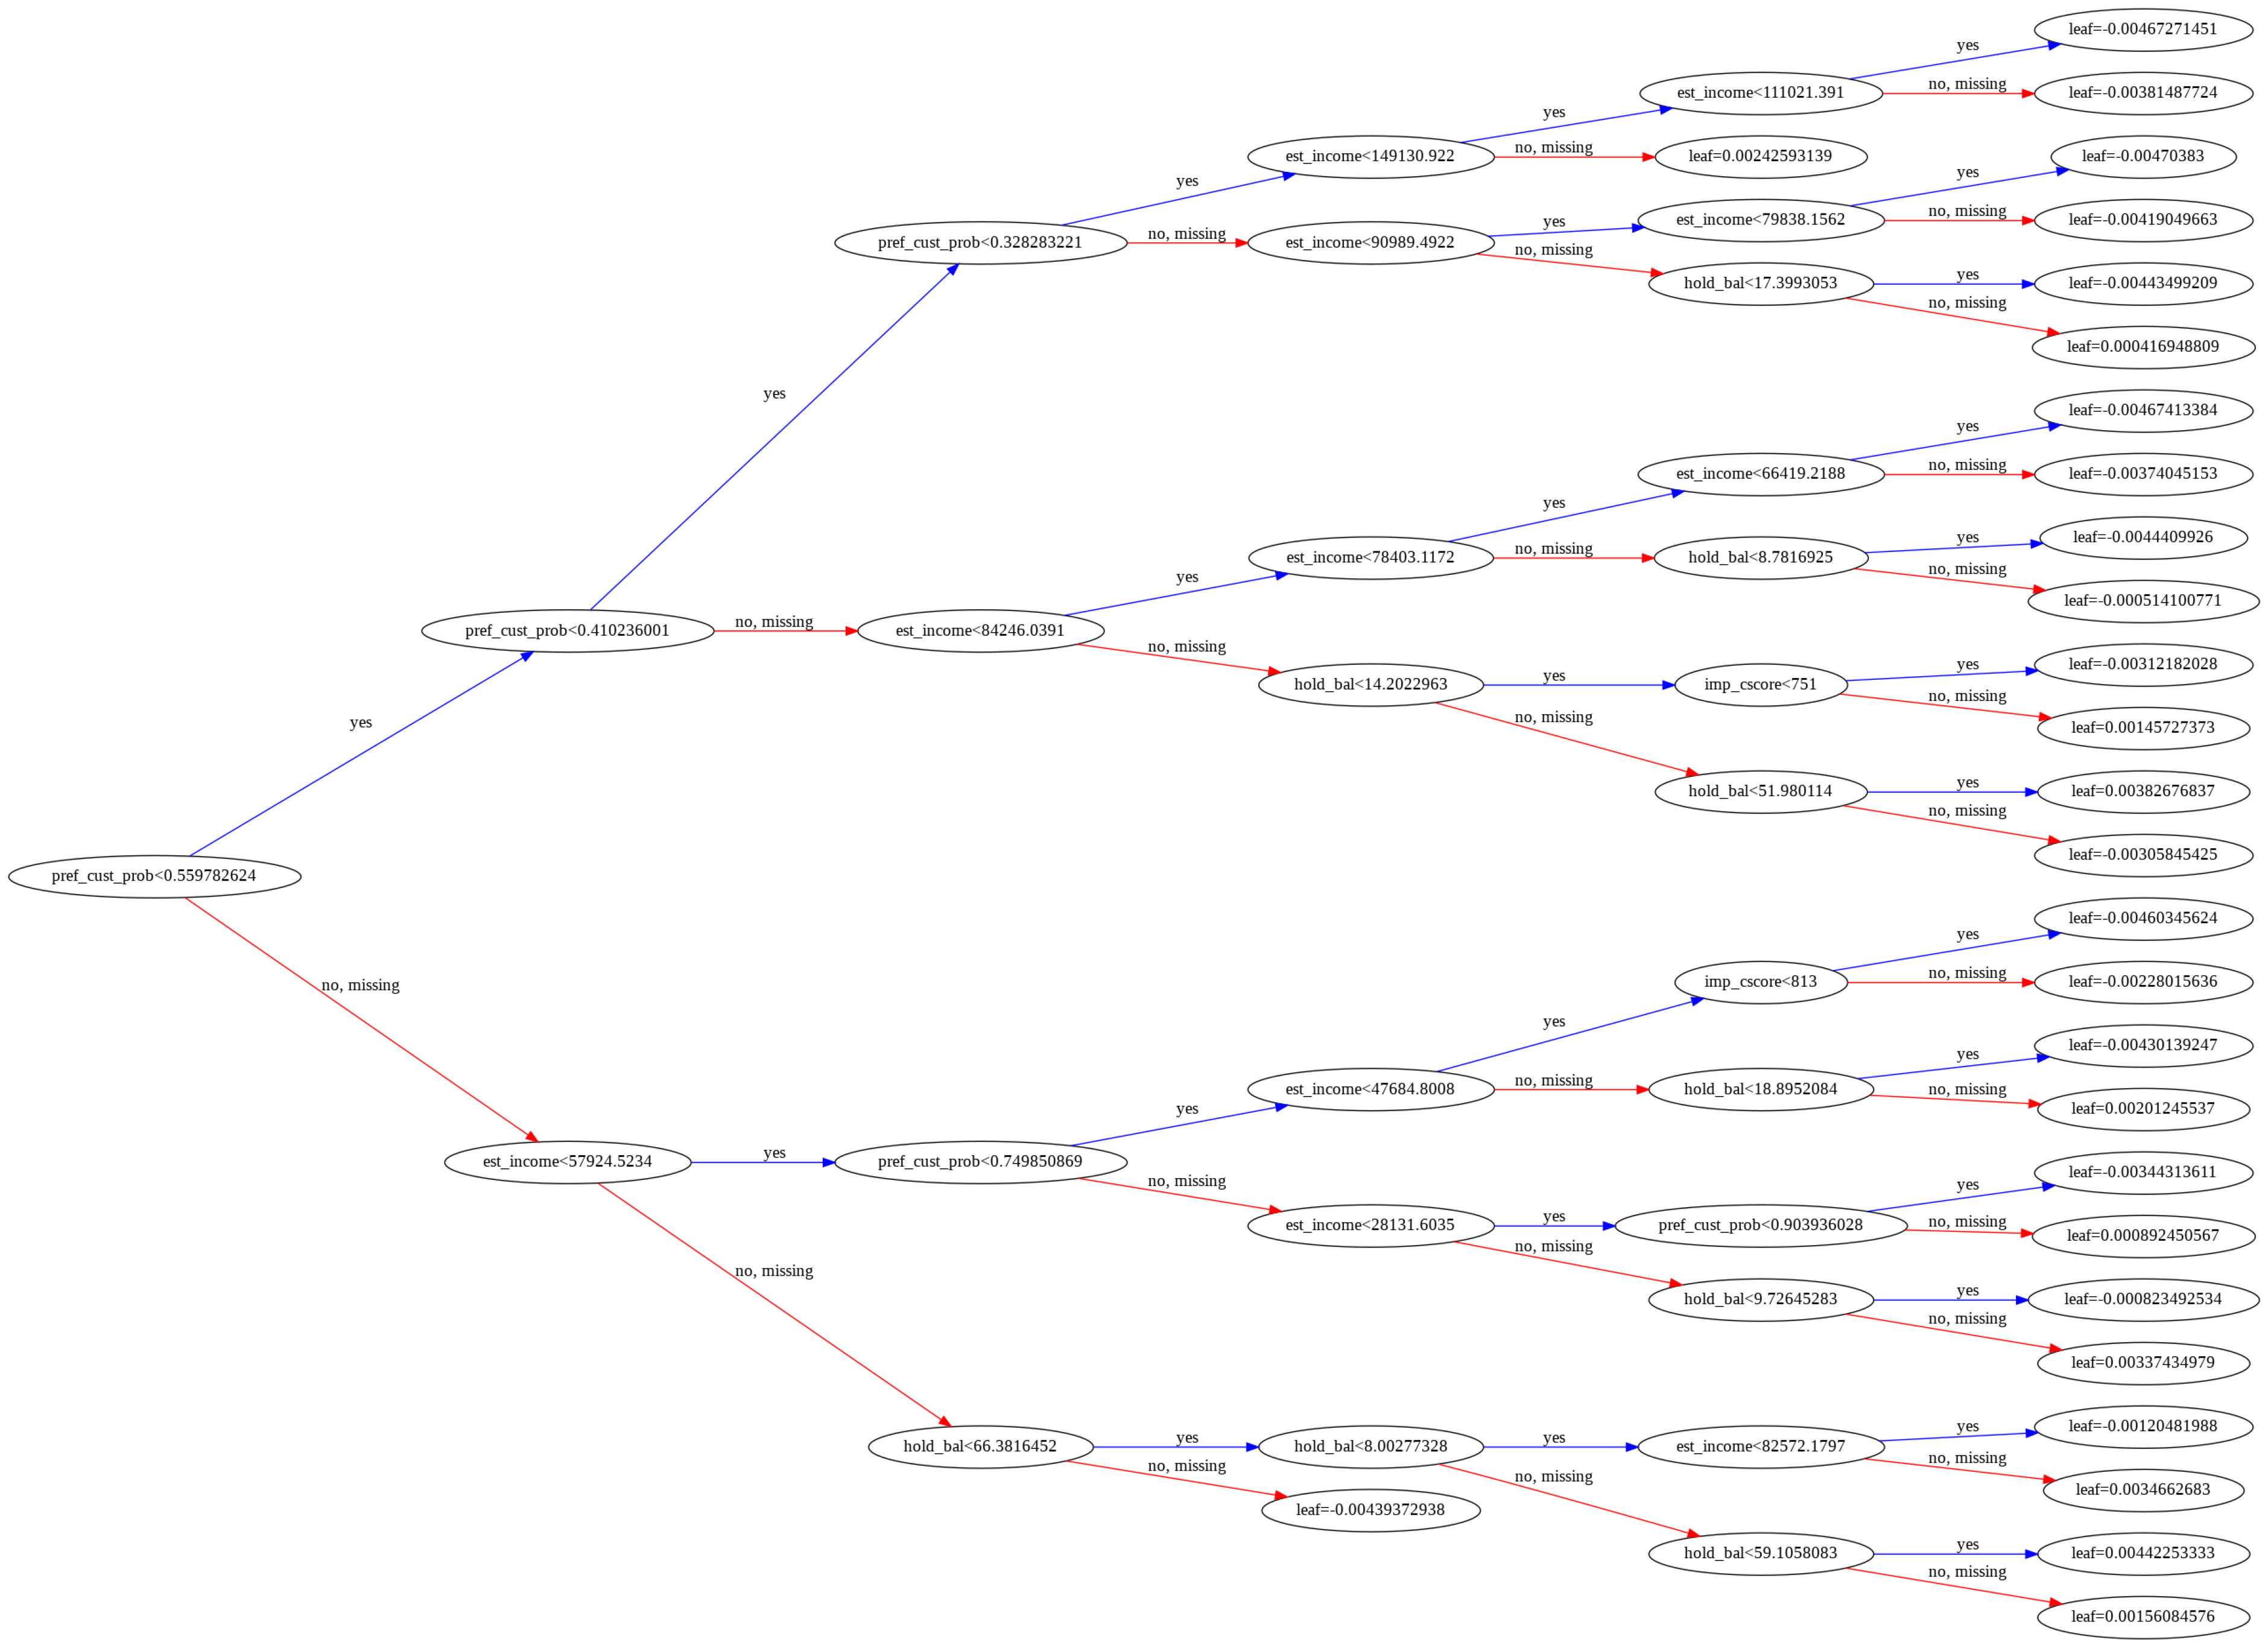

In [0]:
%matplotlib inline
from xgboost import plot_tree
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

##set up the parameters
#f, ax = plt.subplots(figsize =(20, 15)) 
rcParams['figure.figsize'] = 80,50
plt.figure(figsize=(9,8))
plot_tree(bst, num_trees=4, rankdir='LR')

## **Light Gradient Boosting Machines(LGBM)**

In [0]:
from lightgbm import LGBMClassifier

In [0]:
clf_lgb = LGBMClassifier()
clf_lgb.fit(X_train, y_train)
clf_lgb.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_lgb.score(X_test, y_test)))

Accuracy: 0.98


### **Getting important features using LGBM**

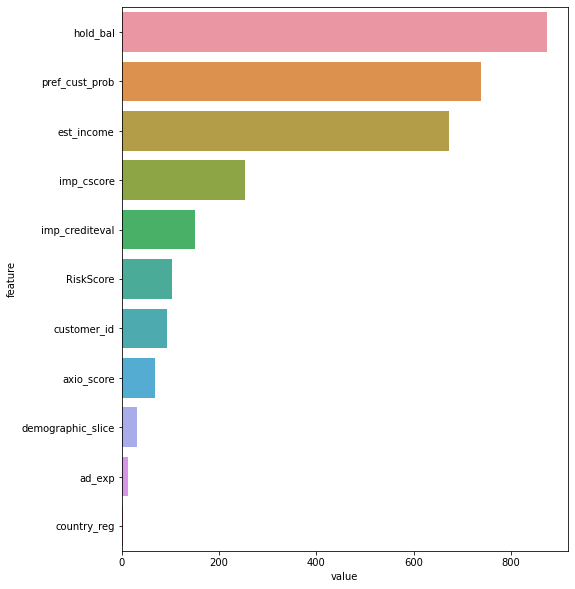

In [0]:
feat_importance = pd.DataFrame()
feat_importance["feature"] = X_train.columns
feat_importance["value"] = clf_lgb.feature_importances_
feat_importance.sort_values(by='value', ascending=False, inplace=True)

plt.figure(figsize=(8,10))
ax = sns.barplot(y="feature", x="value", data=feat_importance)

## **AdaBoost Classifier**

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
clf_abc = AdaBoostClassifier(n_estimators = 100)
clf_abc.fit(X_train, y_train)
clf_abc.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_abc.score(X_test, y_test)))

Accuracy: 0.99


## **Evaluating all the models we did until now and using 5-fold cross-validation to evaluate**

In [0]:
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([clf_knn, clf_lr, clf_dtc, clf_rfc, clf_svc, clf_xgb, clf_lgb, clf_gbc, clf_abc, clf_bgc],
                      ['KNeighbors',
                       'Logistic Regression',
                       'Decision Tree',
                       'Random Forest',
                       'Support Vector Machine',
                       'XGBoost',
                       'LGBoost',
                       'Gradient Boosting',
                       'Ada Boost',
                       'Bagging']):
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(X_test), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.845 (+/- 0.003) [KNeighbors]
Test Accuracy: 0.8344 
Train CV Accuracy: 0.849 (+/- 0.001) [Logistic Regression]
Test Accuracy: 0.8380 
Train CV Accuracy: 0.960 (+/- 0.003) [Decision Tree]
Test Accuracy: 0.9600 
Train CV Accuracy: 0.972 (+/- 0.005) [Random Forest]
Test Accuracy: 0.9712 
Train CV Accuracy: 0.849 (+/- 0.000) [Support Vector Machine]
Test Accuracy: 0.8392 
Train CV Accuracy: 0.977 (+/- 0.003) [XGBoost]
Test Accuracy: 0.9756 
Train CV Accuracy: 0.984 (+/- 0.003) [LGBoost]
Test Accuracy: 0.9828 
Train CV Accuracy: 0.976 (+/- 0.003) [Gradient Boosting]
Test Accuracy: 0.9752 
Train CV Accuracy: 0.985 (+/- 0.002) [Ada Boost]
Test Accuracy: 0.9864 
Train CV Accuracy: 0.974 (+/- 0.003) [Bagging]
Test Accuracy: 0.9732 


**We can see that the best classifier is *Ada Boost* and the next best one is *LGBM*.**

## **Ensembling**

In [0]:
pip install mlens

     |████████████████████████████████| 235kB 2.8MB/s 


In [0]:
from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
from sklearn.metrics import accuracy_score

[MLENS] backend: threading


### **Ensembling with two best classifiers and using AdaBoost as meta.**

In [0]:
ensemble = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)
ensemble.add([clf_abc, clf_lgb])
ensemble.add_meta(AdaBoostClassifier())
ensemble.fit(X_train, y_train)


Fitting 2 layers
Processing layer-1             done | 00:00:02
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:03


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...ffad268>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x7f82cffad268>, shuffle=False,
       verbose=2)

In [0]:
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble.predict(X_train), y_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble.predict(X_test), y_test))


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  0.9953333333333333

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Test :  0.9864


In [0]:
print("Fit data:\n%r" % ensemble.data)

Fit data:
                               score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostclassifier       0.98     0.00  0.96  0.03  0.11  0.01
layer-1  lgbmclassifier           0.98     0.00  0.44  0.12  0.03  0.01



**The accuracy of adaboost alone is 98.64 where as using ensemble the accuracy is 98.52.**

**Note: AdaBoost with base_classifier makes an overfitting.**

# **Predicting the data in Test.csv file using the Ada Boost classifier which has the highest accuracy score until now.**

***The Test.csv file has all the card_offer values as NaN i.e., there are no card_offer values in Test.csv file. 
We use the classifier with high accuracy(Ada Boost Classifier) from above to predict these values. ***

In [0]:
data = pd.read_csv('Test.csv')

In [0]:
X_data = data.drop('card_offer', axis=1)

In [0]:
for column in X_data.columns:
    if X_data[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        X_data[column] = le.fit_transform(X_data[column])

In [0]:
X_data.dtypes

customer_id            int64
demographic_slice      int64
country_reg            int64
ad_exp                 int64
est_income           float64
hold_bal             float64
pref_cust_prob       float64
imp_cscore             int64
RiskScore            float64
imp_crediteval       float64
axio_score           float64
dtype: object

In [0]:
y_data = clf_abc.predict(X_data)

In [0]:
data['card_offer'] = y_data

In [0]:
data['card_offer'] = data['card_offer'].astype(bool)

In [0]:
data['card_offer'].unique()

array([False,  True])

**The data after predicting the values.**

In [0]:
data.head()

customer_id demographic_slice  ... axio_score card_offer
0       596723           AX03efs  ...   0.351222      False
1       841834           AX03efs  ...   0.080106      False
2       402401           AX03efs  ...   0.208180      False
3       734431           AX03efs  ...   0.080122      False
4       739547           AX03efs  ...   0.667270      False

[5 rows x 12 columns]